In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_ND2Q3bm.zip
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_hMYJ020.zip
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_lfbv3c3.csv

--2020-08-31 18:06:14--  https://datahack-prod.s3.amazonaws.com/test_file/Test_ND2Q3bm.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.68
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804568 (1.7M) [application/zip]
Saving to: ‘Test_ND2Q3bm.zip’

Test_ND2Q3bm.zip    100%[===================>]   1.72M  2.74MB/s    in 0.6s    

2020-08-31 18:06:16 (2.74 MB/s) - ‘Test_ND2Q3bm.zip’ saved [1804568/1804568]

--2020-08-31 18:06:16--  https://datahack-prod.s3.amazonaws.com/train_file/Train_hMYJ020.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.124
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4466801 (4.3M) [application/zip]
Saving to: ‘Train_hMYJ020.zip’

Train_hMYJ020.zi

In [ ]:
!unzip Train_hMYJ020.zip
!unzip Test_ND2Q3bm.zip

Archive:  Train_hMYJ020.zip
  inflating: train_data_dict.csv     
   creating: __MACOSX/
  inflating: __MACOSX/._train_data_dict.csv  
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
Archive:  Test_ND2Q3bm.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install rfpimp
!pip install catboost
from sklearn.metrics import mean_absolute_error,accuracy_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,GroupKFold,train_test_split,StratifiedShuffleSplit
from rfpimp import *
from tqdm import tqdm
from catboost import *
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 163kB 3.7MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10261 sha256=7652947a9deaae91d763b7046cf480a866b23f2247026484ab2b53b966a0cb34
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.4.1-cp36-none-any.whl size=35078 sha256=197f9144032642f037b9a38732a39662be1273168cfe3ced19b62c51b5fa3d87
  Stored in directory: /root/.cache/pip/wheels/ca/c1/e1/3e4c41e3420fe9c706dd4d8ef8d7fb5aba1b6a9547649a2d00
Successfully built rfpimp stratx
     |████████████████████████████████| 66.1MB 57kB/s 


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission_lfbv3c3.csv')

In [ ]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
test.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
'''
x1=train[train.Stay == '21-30'][0:6000:]
x2=train[train.Stay == '11-20'][0:6000:]
x3=train[train.Stay == '31-40'][0:6000:]
x4=train[train.Stay == '51-60'][0:6000:]
x5=train[train.Stay == '0-10'][0:6000:]
x6=train[train.Stay == '41-50'][0:6000:]
x7=train[train.Stay == '71-80'][0:6000:]
x8=train[train.Stay == 'More than 100 Days'][0:6000:]
x9=train[train.Stay == '81-90']
x10=train[train.Stay == '91-100']
x11=train[train.Stay == '61-70']
train=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11])
'''

"\nx1=train[train.Stay == '21-30'][0:6000:]\nx2=train[train.Stay == '11-20'][0:6000:]\nx3=train[train.Stay == '31-40'][0:6000:]\nx4=train[train.Stay == '51-60'][0:6000:]\nx5=train[train.Stay == '0-10'][0:6000:]\nx6=train[train.Stay == '41-50'][0:6000:]\nx7=train[train.Stay == '71-80'][0:6000:]\nx8=train[train.Stay == 'More than 100 Days'][0:6000:]\nx9=train[train.Stay == '81-90']\nx10=train[train.Stay == '91-100']\nx11=train[train.Stay == '61-70']\ntrain=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11])\n"

In [ ]:
df=pd.concat([train,test])

In [ ]:
df.nunique(),df.shape,df.dtypes

(case_id                              455495
 Hospital_code                            32
 Hospital_type_code                        7
 City_Code_Hospital                       11
 Hospital_region_code                      3
 Available Extra Rooms in Hospital        18
 Department                                5
 Ward_Type                                 6
 Ward_Facility_Code                        6
 Bed Grade                                 4
 patientid                            131624
 City_Code_Patient                        37
 Type of Admission                         3
 Severity of Illness                       3
 Visitors with Patient                    29
 Age                                      10
 Admission_Deposit                      7634
 Stay                                     11
 dtype: int64, (455495, 18), case_id                                int64
 Hospital_code                          int64
 Hospital_type_code                    object
 City_Code_Hospital     

In [ ]:
df['Bed Grade']=df['Bed Grade'].fillna(5.0)
df['City_Code_Patient']=df['City_Code_Patient'].fillna(39.0)

In [ ]:
x=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age']
#df = pd.get_dummies(df, columns=x)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x:
  df[i] = le.fit_transform(df[i])
for i in x:
  df[i]=df[i]+1

In [ ]:
df['ward_visit']=df['Ward_Type']+df['Visitors with Patient']
df['Hpspital']=df['Hospital_type_code']+df['Hospital_region_code']+df['Hospital_code']+df['City_Code_Hospital']+df['Available Extra Rooms in Hospital']
df['Attribute_need']=df['Available Extra Rooms in Hospital']+df['Department']+df['Ward_Type']+df['Ward_Facility_Code']+df['Bed Grade']
df['patient']=df['patientid']+df['City_Code_Patient']+df['Type of Admission']+df['Severity of Illness']+df['Admission_Deposit']+df['Age']
df['fees']=df['Admission_Deposit']+df['Visitors with Patient']+df['Type of Admission']
df['Ag_x']=df['Visitors with Patient']*df['Type of Admission']

In [ ]:
y=['Bed Grade','City_Code_Patient']
df = pd.get_dummies(df, columns=y)

In [ ]:
'''
x=['ward_visit','Hpspital','Attribute_need','patient','fees','Ag_x','Stay']
for i in df.columns:
  if i in x:
    pass
  else:
    del df[i]
'''

"\nx=['ward_visit','Hpspital','Attribute_need','patient','fees','Ag_x','Stay']\nfor i in df.columns:\n  if i in x:\n    pass\n  else:\n    del df[i]\n"

In [ ]:
train = df[df['Stay'].isnull()==False]
test = df[df['Stay'].isnull()==True]
del test['Stay']
#del train['case_id']
#del test['case_id']

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Stay'] = le.fit_transform(train_df['Stay'])
le.classes_

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)

In [ ]:

from math import sqrt 
from sklearn.metrics import accuracy_score

In [ ]:
X = train_df.drop(labels=['Stay'], axis=1)
y = train_df['Stay'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((238828, 64), (238828,), (79610, 64), (79610,))

In [ ]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=2,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.3619174	test: 0.3619174	test1: 0.3626554	best: 0.3626554 (0)	total: 446ms	remaining: 7m 25s
50:	learn: 0.3867051	test: 0.3867051	test1: 0.3865092	best: 0.3865092 (50)	total: 19s	remaining: 5m 53s
100:	learn: 0.4017578	test: 0.4017578	test1: 0.4002512	best: 0.4002512 (100)	total: 37.6s	remaining: 5m 34s
150:	learn: 0.4065939	test: 0.4065939	test1: 0.4033664	best: 0.4033664 (150)	total: 56.1s	remaining: 5m 15s
200:	learn: 0.4094202	test: 0.4094202	test1: 0.4069212	best: 0.4069212 (200)	total: 1m 14s	remaining: 4m 55s
250:	learn: 0.4121460	test: 0.4121460	test1: 0.4083281	best: 0.4087301 (235)	total: 1m 32s	remaining: 4m 36s
300:	learn: 0.4135445	test: 0.4135445	test1: 0.4100113	best: 0.4100113 (299)	total: 1m 50s	remaining: 4m 17s
350:	learn: 0.4152570	test: 0.4152570	test1: 0.4119709	best: 0.4121467 (345)	total: 2m 9s	remaining: 3m 58s
400:	learn: 0.4161489	test: 0.4161489	test1: 0.4125738	best: 0.4129758 (385)	total: 2m 27s	remaining: 3m 39s
450:	learn: 0.4172543	test: 0.41

In [ ]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.418452455721643


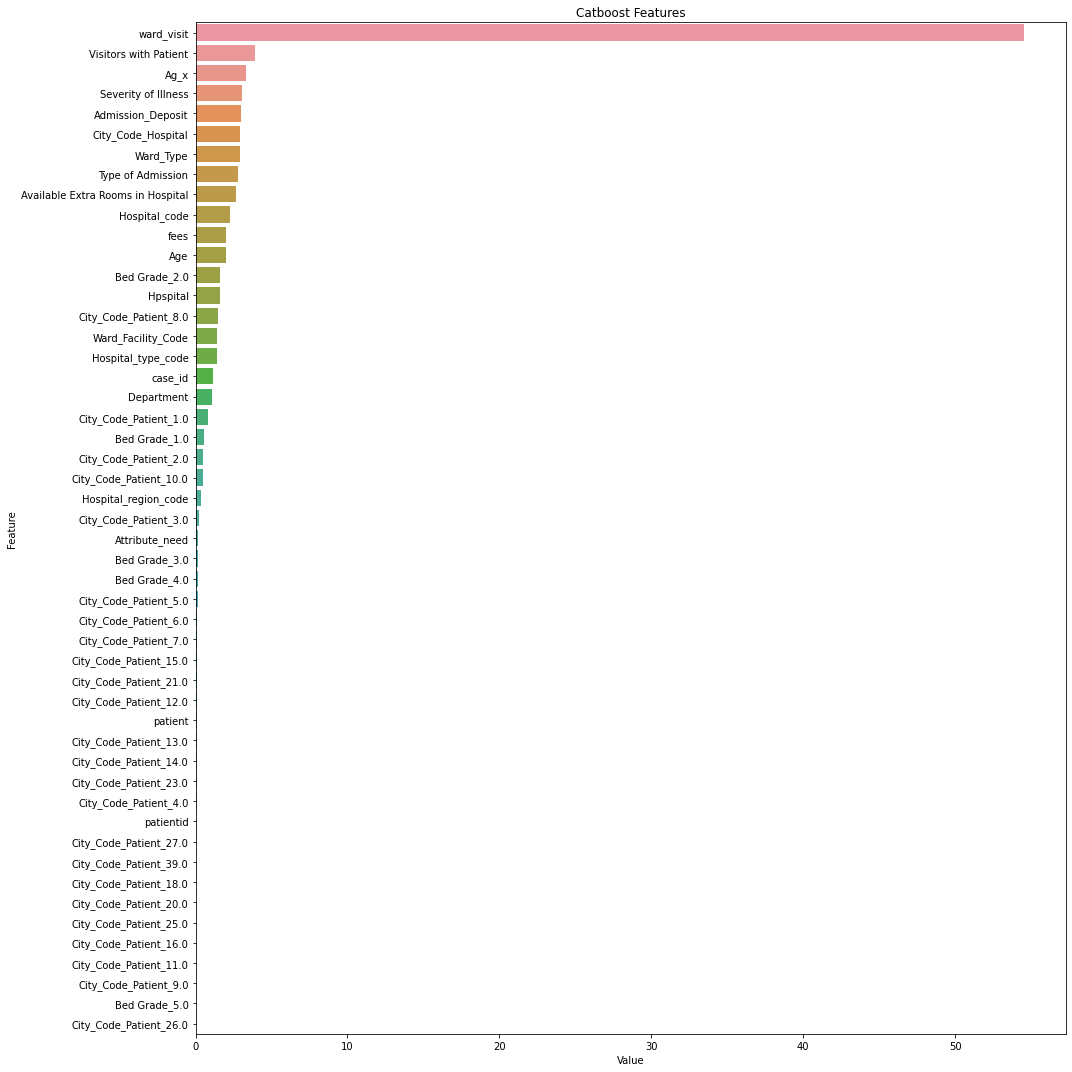

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

In [ ]:
np.mean(errcat,0)

0.4288908428589373

In [ ]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
y_pred_class = le.inverse_transform(cat_final)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
yyy = pd.DataFrame(data=y_pred_class, columns=['Stay'])

In [ ]:
sub['Stay']=yyy['Stay']
sub.head(5)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [ ]:
sub.to_csv('xcd.csv',index=False)

In [ ]:
from google.colab import files
files.download('xcd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
df_train = train_df
df_test = test_df

In [ ]:
X_train = train_df.drop(['Stay'],axis=1)
y_train = train_df['Stay']

In [ ]:
x=[]
for i in test_df.columns:
  x.append(i)
x=np.array(x)
x

array(['case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'patientid', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'ward_visit', 'Hpspital', 'Attribute_need',
       'patient', 'fees', 'Ag_x', 'Bed Grade_1.0', 'Bed Grade_2.0',
       'Bed Grade_3.0', 'Bed Grade_4.0', 'Bed Grade_5.0',
       'City_Code_Patient_1.0', 'City_Code_Patient_2.0',
       'City_Code_Patient_3.0', 'City_Code_Patient_4.0',
       'City_Code_Patient_5.0', 'City_Code_Patient_6.0',
       'City_Code_Patient_7.0', 'City_Code_Patient_8.0',
       'City_Code_Patient_9.0', 'City_Code_Patient_10.0',
       'City_Code_Patient_11.0', 'City_Code_Patient_12.0',
       'City_Code_Patient_13.0', 'City_Code_Patient_14.0',
       'City_Code_Patient_15.0', 'City_Code_Patient_16.0',
       'City_Code_Patient_18.0', 

In [ ]:
feats=x

In [ ]:
splits = 2
folds =StratifiedKFold(n_splits=splits, random_state=42,shuffle=True)
oof_preds = np.zeros((len(df_test), 11))
feature_importance_df = pd.DataFrame()
feature_importance_df['Feature'] = X_train.columns
final_preds = []
random_state = [22,44,66,77,88,99,101]
counter = 0

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values,y_train)):
        print("iter_ {}".format(fold_))
        X_trn,y_trn = X_train[feats].iloc[trn_idx],y_train.iloc[trn_idx]
        X_val,y_val = X_train[feats].iloc[val_idx],y_train.iloc[val_idx]
        clf = lgb.LGBMClassifier(boosting='gbdt',learning_rate=0.1, n_estimators=1000, random_state=101, subsample=0.9,max_depth=-1,num_leaves=31)#
         #,
         #min_data_in_leaf=11,
         #bagging_fraction=0.90,
         #bagging_freq=2,
         #bagging_seed=3,
         #feature_fraction=0.90,
         #feature_fraction_seed=2,
         #early_stopping_round=200,
         #max_bin=1000)#(n_estimators=1000,max_depth=4,random_state=42)#dart
        clf.fit(X_trn, y_trn,eval_set=[(X_trn, y_trn), (X_val, y_val)],verbose=0,
                eval_metric='multi_error',early_stopping_rounds=100)
        
        imp = importances(clf,X_val,y_val)
        imp.rename(columns={'Importance':f'Importance_{fold_}'},inplace=True)
        feature_importance_df = pd.merge(feature_importance_df,imp,on='Feature')
        final_preds.append(accuracy_score(y_pred=clf.predict(X_val),y_true=y_val))
        
        oof_preds += clf.predict_proba(df_test[feats])
oof_preds = oof_preds/splits
print(sum(final_preds)/splits)

iter_ 0
iter_ 1
0.42508117749766045


In [ ]:
preds_x = [np.argmax(x) for x in oof_preds]

In [ ]:
y_pred_class = le.inverse_transform(preds_x)

In [ ]:
sub['Stay']=y_pred_class
sub.head(5)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [ ]:
sub.to_csv('tino.csv',index=False)

In [ ]:
from google.colab import files
files.download('tino.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# F2

In [ ]:
X = train_df.drop(labels=['Stay'], axis=1)
y = train_df['Stay'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((222906, 64), (222906,), (95532, 64), (95532,))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=100, random_state=42, subsample=0.8, max_features=10)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
y_pred=y_pred.round()
print('roc_auc_score', accuracy_score(y_cv, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           4.4904           0.1157           19.85s
         2           4.3984           0.1038           17.85s
         3           4.1225           0.2784           17.65s
         4           3.9451           0.1788           18.20s
         5           3.8501           0.0994           17.71s
         6           3.7785           0.0682           17.52s
         7           3.7534           0.0410           16.52s
         8           3.7026           0.0388           16.31s
         9           3.6170           0.0788           16.11s
        10           3.5639           0.0526           15.50s
        20           2.9480           0.0206           13.59s
        30           2.7491           0.0030           11.76s
        40           2.6304           0.0052            9.79s
        50           2.5571           0.0034            8.22s
        60           2.5389           0.0016            6.53s
       

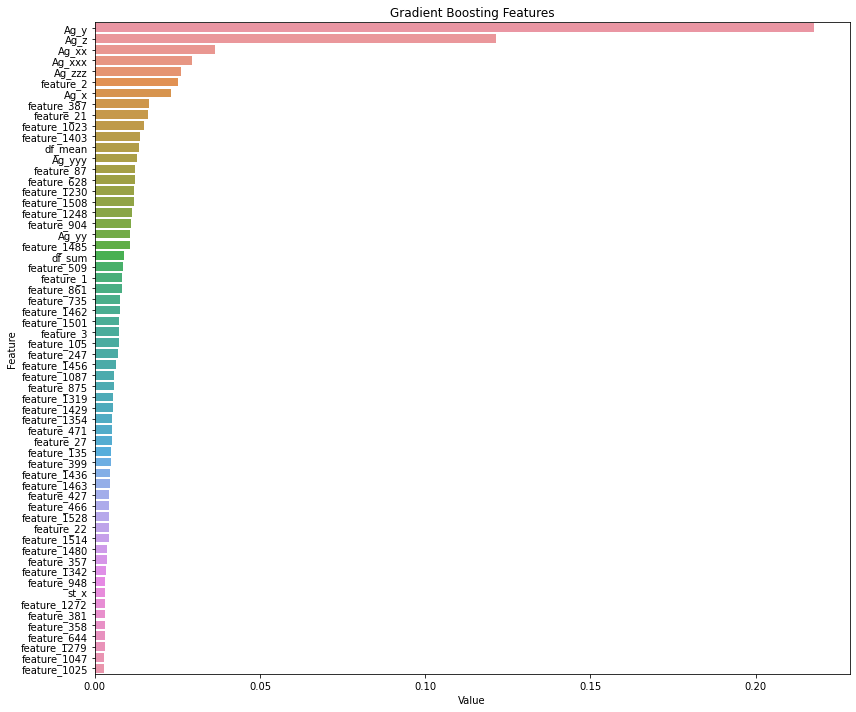

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=101, subsample=0.8, max_features='log2')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', roc_auc_score(y_test, y_pred))

    errgb.append(roc_auc_score(y_test, y_pred))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSE 0.9044860368389781
RMSE 0.9334024618678085
RMSE 0.9051497792099296
RMSE 0.9386386939033048


In [ ]:
np.mean(errgb)

0.9204192429550052

In [ ]:
final = np.mean(y_pred_totgb,0)

In [ ]:
submission = pd.DataFrame({
        "Class":final
    })
submission.to_csv('./ensemble.csv', index=False)
print(submission)

        Class
0    0.233190
1    0.036421
2    0.041921
3    0.298441
4    0.492069
..        ...
751  0.030880
752  0.029883
753  0.032121
754  0.029024
755  0.032459

[756 rows x 1 columns]


In [ ]:
from google.colab import files
files.download('ensemble.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_bhn.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_submission-lgbm.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_catboost-sub.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_ccc.csv

--2020-09-05 17:33:14--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_bhn.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.80
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949558 (1.9M) [application/vnd.ms-excel]
Saving to: ‘889_613210_us_bhn.csv’

889_613210_us_bhn.c 100%[===================>]   1.86M  2.85MB/s    in 0.7s    

2020-09-05 17:33:15 (2.85 MB/s) - ‘889_613210_us_bhn.csv’ saved [1949558/1949558]

--2020-09-05 17:33:16--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics-ii/889_613210_us_submission-lgbm.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiti

In [ ]:
w=pd.read_csv('889_613210_us_ccc.csv')
x=pd.read_csv('889_613210_us_bhn.csv')
y=pd.read_csv('889_613210_us_submission-lgbm.csv')
z=pd.read_csv('889_613210_us_catboost-sub.csv')

In [ ]:
w.head(2)

,case_id,Stay
0,318439,0-10
1,318440,51-60


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w['Stay'] = le.fit_transform(w['Stay'])
x['Stay'] = le.fit_transform(x['Stay'])
y['Stay'] = le.fit_transform(y['Stay'])
z['Stay'] = le.fit_transform(z['Stay'])

In [ ]:
zz=w['Stay']*1+x['Stay']*0.05+y['Stay']*0.03+z['Stay']*0.02

In [ ]:
zz=(zz.round()).astype(int)

In [ ]:
y_pred_class = le.inverse_transform(zz)

In [ ]:
x['Stay']=y_pred_class

In [ ]:
x.to_csv('more.csv',index=False)